###  PCA AND TSNE VISUALIZATION 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
Train_data= pd.read_csv('Final_train_data.csv')
print('The preprocessed data shape',Train_data.shape)
Train_data.head(2)

The preprocessed data shape (558211, 267)


Unnamed: 0  PerProvider_InscClaimAmtReimbursed_count  \
0           0                                       107   
1           1                                       107   

   PerProvider_DeductibleAmtPaid_count  \
0                                  107   
1                                  107   

   PerProvider_IPAnnualReimbursementAmt_count  \
0                                         107   
1                                         107   

   PerProvider_IPAnnualDeductibleAmt_count  \
0                                      107   
1                                      107   

   PerProvider_OPAnnualReimbursementAmt_count  \
0                                         107   
1                                         107   

   PerProvider_OPAnnualDeductibleAmt_count  PerProvider_age_count  \
0                                      107                    107   
1                                      107                    107   

   PerProvider_Hospitalized_period_count  PerProvider_claim_period_count  ...  \
0                                    107                             107  ...   
1                                    107                             107  ...   

   risk_score   age  died  PotentialFraud  Gender_1  Gender_2  Race_1  Race_2  \
0           7  67.0     0               1         1         0       1       0   
1           5  78.0     0               1         1         0       1       0   

   Race_3  Race_5  
0       0       0  
1       0       0  

[2 rows x 267 columns]

In [3]:
#separating datapoints and target
X=Train_data.drop(['Unnamed: 0','Provider','PotentialFraud'],axis=1)
label=Train_data['PotentialFraud']

In [4]:
print('The shpae of Train data', X.shape)
print('The shpae of label data', label.shape)

The shpae of Train data (558211, 264)
The shpae of label data (558211,)


In [5]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(X)
print('The shape of standardized data',std_data.shape)

The shape of standardized data (558211, 264)


#### Let's decrease dimensinality of the data and see how how data looks like!!!
1. Using PCA (Principal Component Analysis) dimensionality reduction technique, we are reducing the dimensions into 2 by preserving the highest variance features.

In [6]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2,random_state=42)

pca_data = pca.fit_transform(std_data)

# pca_reduced will contain the 2-d data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (558211, 2)


2. create a dataframe with the dimensions obtained from pca by stacking labels

In [7]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T
print("The shape of data after stacking labels",pca_data.shape)

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
print("The shape of PCA dataframe is",pca_df.shape)
pca_df.head(4)

The shape of data after stacking labels (558211, 3)
The shape of PCA dataframe is (558211, 3)


1st_principal  2nd_principal  label
0      24.098686      -0.748596    1.0
1      10.122591      -0.499105    1.0
2      41.884550       1.570077    1.0
3      37.751004      -4.376484    1.0

3. let's plot and see how our data looks like and whether our data is distinguishable or not

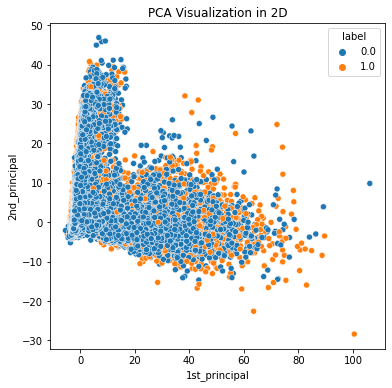

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=pca_df,x='1st_principal',y='2nd_principal', hue='label')
plt.title('PCA Visualization in 2D')
plt.show()

#### Observations
1. The size of our data is large, i.e. we have 558211 samples. so the plot became mess.
2. Most portion of the plot is overlapped, we have the chance of both fraud and non fraud points.
3. If we observe clearly it looks like the fraud and non fraud points are stacked as two layers one above the other, we try to visualize with less samples so that we may get clear view.

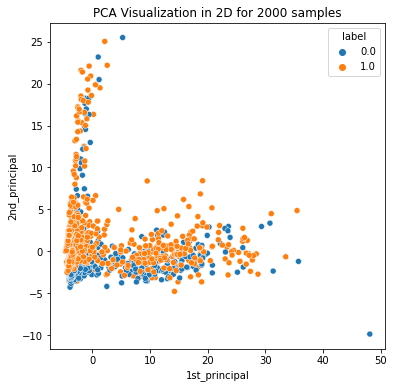

In [9]:
X1=X.head(2000)
label1=label.head(2000)

#standardization
std_data1 = StandardScaler().fit_transform(X1)
#pca
pca_data1 = pca.fit_transform(std_data1)
pca_data1 = np.vstack((pca_data1.T, label1)).T
#creating dataframe
pca_df1 = pd.DataFrame(data=pca_data1, columns=("1st_principal", "2nd_principal", "label"))

plt.figure(figsize=(6,6))
sns.scatterplot(data=pca_df1,x='1st_principal',y='2nd_principal', hue='label')
plt.title('PCA Visualization in 2D for 2000 samples')
plt.show()

#### Observations
1. we can observe this plot is slightly better.
2. There are portions where we can seperate fraud and non fraud data.
3. it will be more clear if we observe the plot in 3D.

#### Lets check hou much variance we preserved while above plots

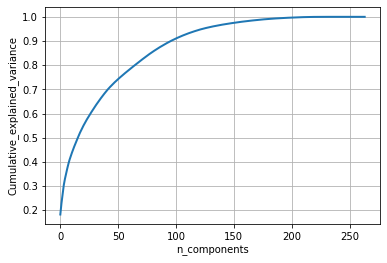

In [26]:
# PCA for dimensionality redcution (non-visualization)
pca= decomposition.PCA(n_components = 264)
pca_data = pca.fit_transform(std_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#### Observations
1. its visible that by using n_components=2, we preserved only 20% of variance.
2. It might be reason why our targets are not so distinguishable.
3. If we increase the dimensionality we may get better understanding and better view.

#### TSNE VISUALIZATION

#### Lets check how TSNE helps in visualizing our data

In [12]:
# TSNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(std_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

In [13]:
#it took lot of time for computing large data, so we save the dataframe for future use
#tsne_df.to_csv('tsne.csv')
tsne_df=pd.read_csv('tsne.csv')

#### How tsne plot looks like !!!

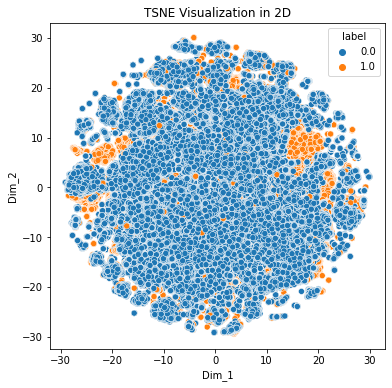

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=tsne_df,x='Dim_1',y='Dim_2', hue='label')
plt.title('TSNE Visualization in 2D')
plt.show()

#### Observations
1. we got similar plot to PCA, where one layer overlaps the other.
2. while, there are some portions we can clearly seperate byh fraud and non fraud providers.
3. let's decrease our samples and change the perplexity, learning rate and see how it comes. 

C:\Users\HP\anaconda3\envs\tf-gpu1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


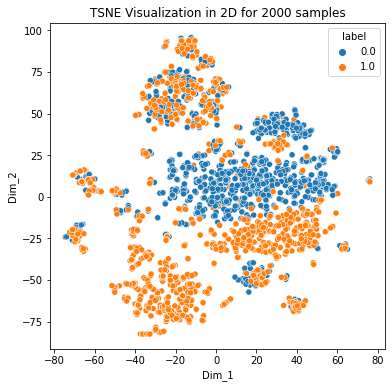

In [15]:
# TSNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=10, learning_rate=100, random_state=0)
tsne_data1 = model.fit_transform(std_data1)

# creating a new data frame which help us in ploting the result data
tsne_data1 = np.vstack((tsne_data1.T, label1)).T
tsne_df1 = pd.DataFrame(data=tsne_data1, columns=("Dim_1", "Dim_2", "label"))
#plot
plt.figure(figsize=(6,6))
sns.scatterplot(data=tsne_df1,x='Dim_1',y='Dim_2', hue='label')
plt.title('TSNE Visualization in 2D for 2000 samples')
plt.show()

#### Observations
1. we have got a better where its data points are clearly separated from each other.
2. There are samll portions overlapping but its a better plot than previous plots.

### Let's see how our data looks in 3D

In [8]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

#### Using 3D scatter plot
1. To have clear view we are taking only few samples(2000).
2. First we are taking equal samples of both fraud and non fraud datapoins.

In [9]:
#Fraud datapoints
Fraud_data=Train_data[Train_data['PotentialFraud']==1].head(2000)
#Non fraud datapoints
NonFraud_data=Train_data[Train_data['PotentialFraud']==0].head(2000)

print('Fraud data shape', Fraud_data.shape)
print('NonFraud data shape', NonFraud_data.shape)

Fraud data shape (2000, 267)
NonFraud data shape (2000, 267)


3. Using PCA to reduce the dimensions from 267 to 3D
4. Create dataframes with 3 dimensions

In [10]:
X_Fraud= Fraud_data.drop(['Unnamed: 0','Provider','PotentialFraud'],axis=1)
X_NonFraud= NonFraud_data.drop(['Unnamed: 0','Provider','PotentialFraud'],axis=1)

#standardizing
std_Fraud_data = StandardScaler().fit_transform(X_Fraud)
std_NonFraud_data = StandardScaler().fit_transform(X_NonFraud)
#pca
pca = decomposition.PCA(n_components=3)
pca_Fraud_data = pca.fit_transform(std_Fraud_data)
pca_NonFraud_data = pca.fit_transform(std_NonFraud_data)

# creating a new data fram which help us in ploting the result data
pca_fraud_df = pd.DataFrame(data=pca_Fraud_data, columns=("1st_principal", "2nd_principal", "3rd_principal"))
pca_nonfraud_df = pd.DataFrame(data=pca_NonFraud_data, columns=("1st_principal", "2nd_principal", "3rd_principal"))

# pca_reduced will contain the 3-d data
print("shape of pca_reduced_fraud_data.shape = ", pca_fraud_df.shape)
print("shape of pca_reduced_non_fraud_data.shape = ", pca_nonfraud_df.shape)

shape of pca_reduced_fraud_data.shape =  (2000, 3)
shape of pca_reduced_non_fraud_data.shape =  (2000, 3)


#### plottind 3D scatter plot

In [11]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=pca_fraud_df['1st_principal'],y=pca_fraud_df['2nd_principal'],z=pca_fraud_df['3rd_principal'], name = 'Fraud')
trace2 = go.Scatter3d(x=pca_nonfraud_df['1st_principal'],y=pca_nonfraud_df['2nd_principal'],z=pca_nonfraud_df['3rd_principal'], name = 'Non Fraud')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='1st_principal'),
        yaxis = dict(title='2nd_principal'),
        zaxis = dict(title='3rd_principal'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### Let's Do Clustering Analysis

#### performing Kmeans clustering

1. performing Kmeans clustering on dimentionality reduced data, to have a clear view on how clusters are formed.

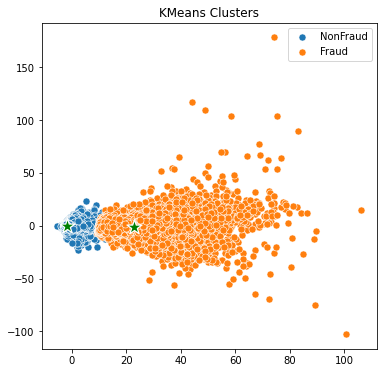

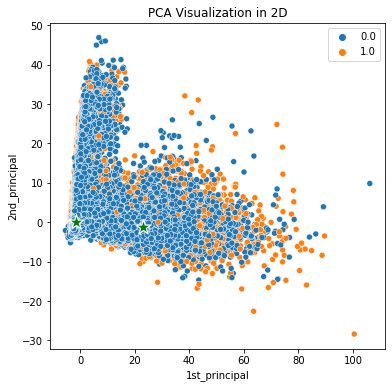

In [28]:
from sklearn.cluster import KMeans
#lets check with 2 clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 101)
y_pred = kmeans.fit_predict(pca_data)
#centroids - center for each cluster
centroids = kmeans.cluster_centers_

#Kmeans plottinf
plt.figure(figsize=(6,6))
sns.scatterplot(x=pca_data[y_pred == 0, 0], y=pca_data[y_pred == 0, 10],s=50, label='NonFraud')
sns.scatterplot(x=pca_data[y_pred == 1, 0], y=pca_data[y_pred == 1, 10],s=50, label='Fraud')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*', color='green', s=250)
plt.title('KMeans Clusters')
plt.legend()
plt.show()

#pca plotting
plt.figure(figsize=(6,6))
sns.scatterplot(x='1st_principal',y='2nd_principal',data=pca_df, hue='label')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*', color='green', s=250)
plt.title('PCA Visualization in 2D')
plt.show()

#### Observations
1. Using Kmeans we can able to cluster the points into 2 clusters
2. by comparing with the PCA data visualization we can understand it performs better.

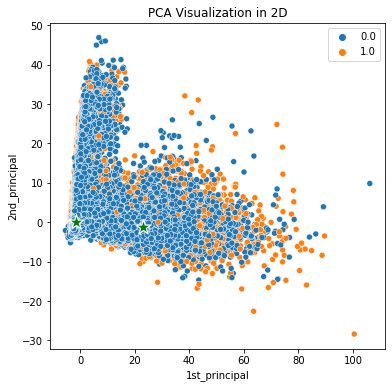

In [95]:
#pca plotting
plt.figure(figsize=(6,6))
sns.scatterplot(x='1st_principal',y='2nd_principal',data=pca_df, hue='label')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*', color='green', s=250)
plt.title('PCA Visualization in 2D')
plt.show()

#### let's check how many optimal clusters can be formed.

In [136]:
from sklearn.cluster import KMeans
elbow1=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(std_data)
    elbow1.append(kmeans.inertia_)

In [104]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(20, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(std_data)
    elbow.append(kmeans.inertia_)

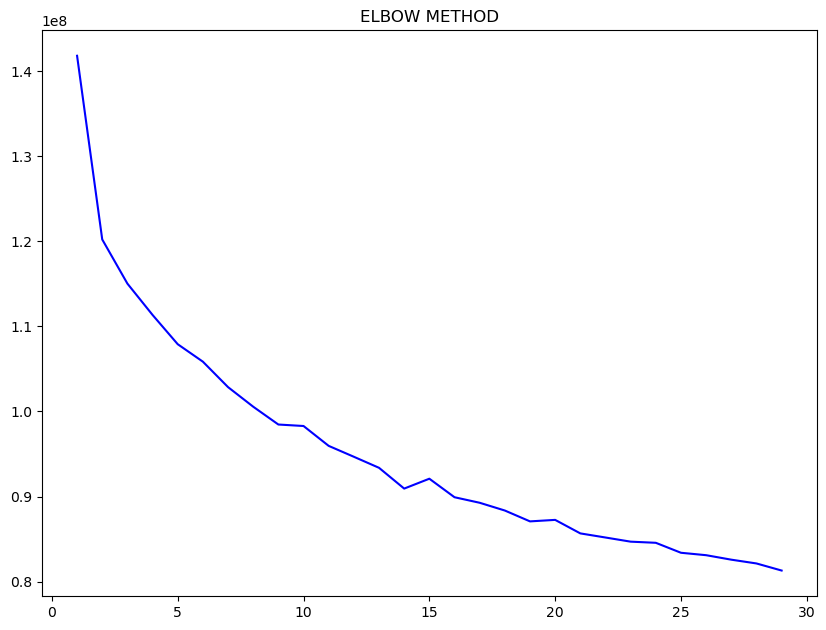

In [135]:
sns.lineplot(x=range(1, 30),y=elbow1,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

#### Observations
1. we performed Kmeans clustering on the standardized train data for 20 clusters.
2. 2 clusters are not optimal clusters.
3. we can cluster them into more than 15 clusters.

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



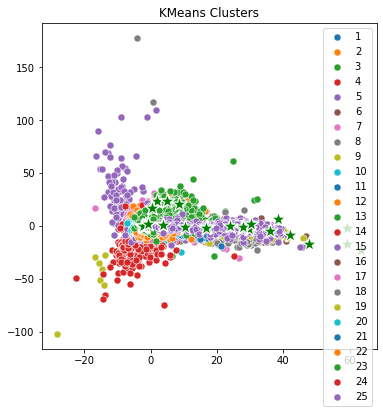

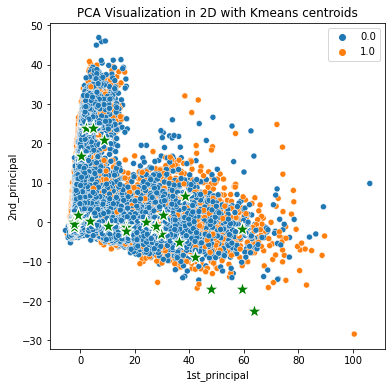

In [29]:
from sklearn.cluster import KMeans
#lets check with 2 clusters
kmeans = KMeans(n_clusters = 25, init = 'k-means++', random_state = 101)
y_pred = kmeans.fit_predict(pca_data)
#centroids - center for each cluster
centroids = kmeans.cluster_centers_

#Kmeans plottinf
plt.figure(figsize=(6,6))
sns.scatterplot(x=pca_data[y_pred == 0, 1], y=pca_data[y_pred == 0, 10],s=50, label='1')
sns.scatterplot(x=pca_data[y_pred == 1, 1], y=pca_data[y_pred == 1, 10],s=50, label='2')
sns.scatterplot(x=pca_data[y_pred == 2, 1], y=pca_data[y_pred == 2, 10],s=50, label='3')
sns.scatterplot(x=pca_data[y_pred == 3, 1], y=pca_data[y_pred == 3, 10],s=50, label='4')
sns.scatterplot(x=pca_data[y_pred == 4, 1], y=pca_data[y_pred == 4, 10],s=50, label='5')
sns.scatterplot(x=pca_data[y_pred == 5, 1], y=pca_data[y_pred == 5, 10],s=50, label='6')
sns.scatterplot(x=pca_data[y_pred == 6, 1], y=pca_data[y_pred == 6, 10],s=50, label='7')
sns.scatterplot(x=pca_data[y_pred == 7, 1], y=pca_data[y_pred == 7, 10],s=50, label='8')
sns.scatterplot(x=pca_data[y_pred == 8, 1], y=pca_data[y_pred == 8, 10],s=50, label='9')
sns.scatterplot(x=pca_data[y_pred == 9, 1], y=pca_data[y_pred == 9, 10],s=50, label='10')
sns.scatterplot(x=pca_data[y_pred == 10, 1], y=pca_data[y_pred == 10, 10],s=50, label='11')
sns.scatterplot(x=pca_data[y_pred == 11, 1], y=pca_data[y_pred == 11, 10],s=50, label='12')
sns.scatterplot(x=pca_data[y_pred == 12, 1], y=pca_data[y_pred == 12, 10],s=50, label='13')
sns.scatterplot(x=pca_data[y_pred == 13, 1], y=pca_data[y_pred == 13, 10],s=50, label='14')
sns.scatterplot(x=pca_data[y_pred == 14, 1], y=pca_data[y_pred == 14, 10],s=50, label='15')
sns.scatterplot(x=pca_data[y_pred == 15, 1], y=pca_data[y_pred == 15, 10],s=50, label='16')
sns.scatterplot(x=pca_data[y_pred == 16, 1], y=pca_data[y_pred == 16, 10],s=50, label='17')
sns.scatterplot(x=pca_data[y_pred == 17, 1], y=pca_data[y_pred == 17, 10],s=50, label='18')
sns.scatterplot(x=pca_data[y_pred == 18, 1], y=pca_data[y_pred == 18, 10],s=50, label='19')
sns.scatterplot(x=pca_data[y_pred == 19, 1], y=pca_data[y_pred == 19, 10],s=50, label='20')
sns.scatterplot(x=pca_data[y_pred == 20, 1], y=pca_data[y_pred == 20, 10],s=50, label='21')
sns.scatterplot(x=pca_data[y_pred == 21, 1], y=pca_data[y_pred == 21, 10],s=50, label='22')
sns.scatterplot(x=pca_data[y_pred == 22, 1], y=pca_data[y_pred == 22, 10],s=50, label='23')
sns.scatterplot(x=pca_data[y_pred == 23, 1], y=pca_data[y_pred == 23, 10],s=50, label='24')
sns.scatterplot(x=pca_data[y_pred == 24, 1], y=pca_data[y_pred == 24, 10],s=50, label='25')

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*', color='green', s=250)
plt.title('KMeans Clusters')
plt.legend()
plt.show()

#pca plotting
plt.figure(figsize=(6,6))
sns.scatterplot(x='1st_principal',y='2nd_principal',data=pca_df, hue='label')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*', color='green', s=250)
plt.title('PCA Visualization in 2D with Kmeans centroids')
plt.show()

In [30]:
import pickle
pickle.dump(kmeans, open("kmeans25.pkl", "wb"))

#### Observations
1. we can see the data points are well clustered.

#### Now we will add the clustered label as a new feature to our data and Lets see which may help out

In [113]:
Final_Train_data['cluster']=y_pred

In [125]:
Test_data= pd.read_csv('Final_test_data.csv')
X=Test_data.drop(['Unnamed: 0','Provider'],axis=1)
std_test_data = StandardScaler().fit_transform(X)

In [128]:
y_test_pred= kmeans.predict(std_test_data)

In [140]:
Test_data['cluster']=y_test_pred
Train_data['cluster']=y_pred

In [141]:
Train_data.to_csv('train_cluster_data.csv')
Test_data.to_csv('test_cluster_data.csv')

#### Analysing Cluster Feature

In [7]:
unique_clusters = Train_data['cluster'].value_counts()
print('Number of clusters :', unique_clusters.shape[0])
print(unique_clusters.head(25))

Number of clusters : 25
1     183249
0     174836
15     73881
20     34214
3      22345
10     16892
2       7661
17      7167
14      7030
19      6913
21      5287
6       4152
11      3377
5       3373
9       3026
22      2263
24      1204
13       830
18       372
4        102
12        26
8          7
7          2
16         1
23         1
Name: cluster, dtype: int64


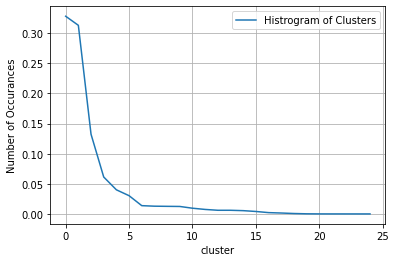

In [8]:
s = sum(unique_clusters.values);
h = unique_clusters.values/s;
plt.plot(h, label="Histrogram of Clusters")
plt.xlabel('cluster')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

#### Observations
1. we have more data for first five clusters 
2. we have very low datapoints for clusters greater than 5.